In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('datasets/titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.drop(inplace=True, columns=['Name', 'Ticket', 'PassengerId', 'Cabin'])

In [6]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


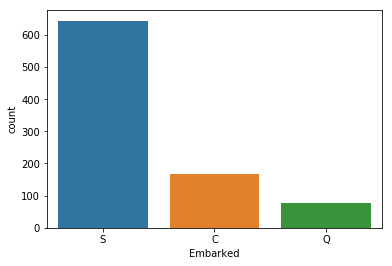

In [7]:
sns.countplot(train['Embarked'])

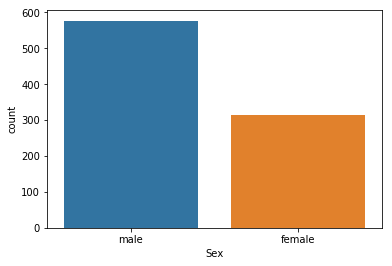

In [8]:
sns.countplot(train['Sex'])

In [9]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
train['Embarked'].replace(("S", "C", "Q"), (0,1,2), inplace=True)

In [11]:
train['Sex'].replace(("male", "female"), (0,1), inplace=True)

In [12]:
train.count()

Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
Embarked    889
dtype: int64

In [13]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

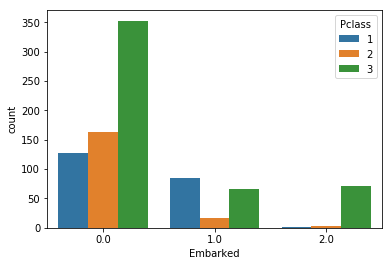

In [14]:
sns.countplot(train['Embarked'], hue=train['Pclass'])

In [15]:
#What is the class of these missing Embarked?
null_data = train[train.isnull().any(axis=1)]

In [16]:
#null_data

In [17]:
train['Embarked'].fillna(1, inplace=True)

In [18]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [19]:
#Replace NaN in Age with Average.

In [20]:
#df.loc[(df['column_name'] == some_value) & df['other_column'].isin(some_values)]

In [21]:
pClass1 = train.loc[train['Pclass'] == 1]
pClass2 = train.loc[train['Pclass'] == 2]
pClass3 = train.loc[train['Pclass'] == 3]

In [22]:
#Calculate Average age of each class
avgAge1 = pClass1['Age'].mean()
avgAge2 = pClass2['Age'].mean()
avgAge3 = pClass3['Age'].mean()

In [23]:
avgAge1

38.233440860215055

In [24]:
avgAge2

29.87763005780347

In [25]:
avgAge3

25.14061971830986

In [26]:
pClass1.fillna(pClass1['Age'].mean(), inplace=True)

/Users/sviras/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [27]:
#conCatTrain = pd.concat([pClass1, pClass2, pClass3])
pClass2.fillna(pClass2['Age'].mean(), inplace=True)

/Users/sviras/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [28]:
pClass3.fillna(pClass3['Age'].mean(), inplace=True)

/Users/sviras/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [29]:
#Concat all 3 dataframe pieces.

conCatTrain = pd.concat([pClass1, pClass2, pClass3])

In [30]:
from sklearn.cross_validation import train_test_split

/Users/sviras/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
X = conCatTrain[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
y = conCatTrain['Survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [33]:
X_train.count()

Pclass      623
Sex         623
Age         623
SibSp       623
Parch       623
Fare        623
Embarked    623
dtype: int64

In [34]:
X_test.count()

Pclass      268
Sex         268
Age         268
SibSp       268
Parch       268
Fare        268
Embarked    268
dtype: int64

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [36]:
classifier = LogisticRegression()

In [37]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
predictions = classifier.predict(X_test)

In [40]:
print("Test Set Accuracy: {0:.4f}".format(accuracy_score(y_test,predictions )))

Test Set Accuracy: 0.8545


In [ ]:
from sklearn.linear_model import cl